###**Purpose : Identify Portfolio Trends & Risk Patterns**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/content/sample_data/financial_loan.xlsx")

In [5]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


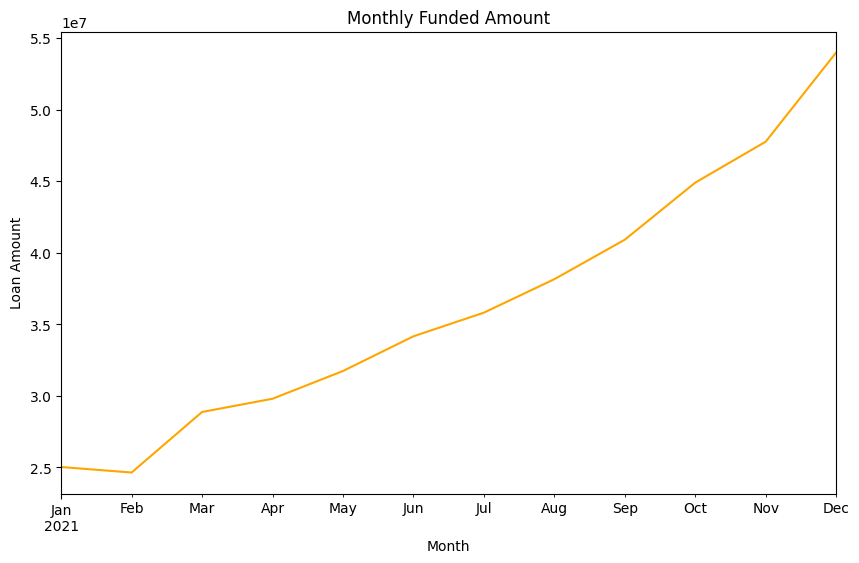

In [7]:
# Monthly Funded Amount
monthly = (
    df.groupby(df['issue_date'].dt.to_period('M'))['loan_amount']
    .sum()
    .sort_index()
)
monthly.plot(kind='line', figsize=(10,6),color='orange')
plt.title("Monthly Funded Amount")
plt.xlabel("Month")
plt.ylabel("Loan Amount")
plt.show()

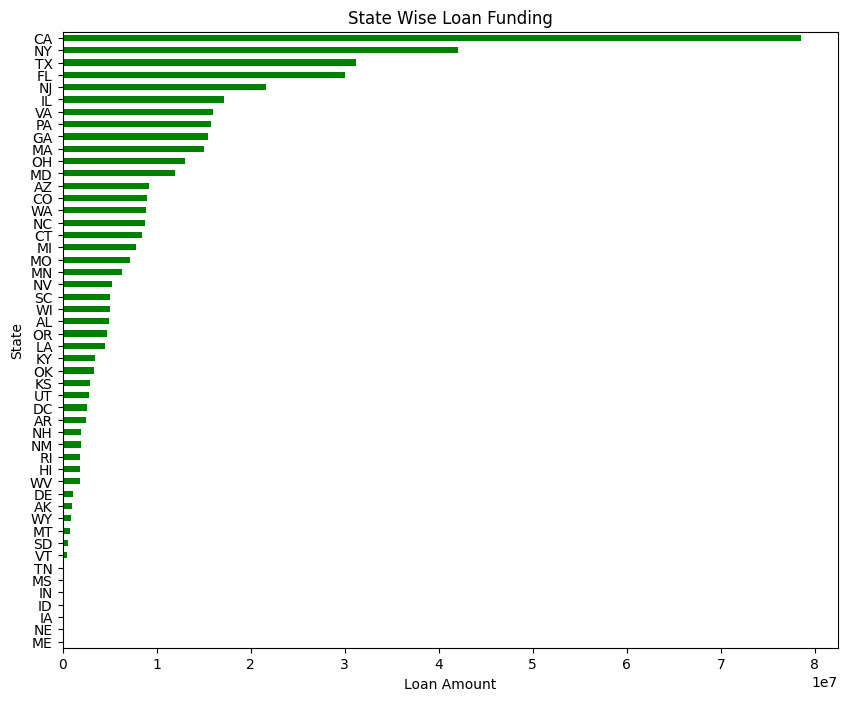

In [ ]:
# State Wise Loan Amount
state_data = df.groupby('address_state')['loan_amount'].sum()

state_data.sort_values().plot(kind='barh', figsize=(10,8),color='green')
plt.xlabel("Loan Amount")
plt.ylabel("State")
plt.title("State Wise Loan Funding")
plt.show()

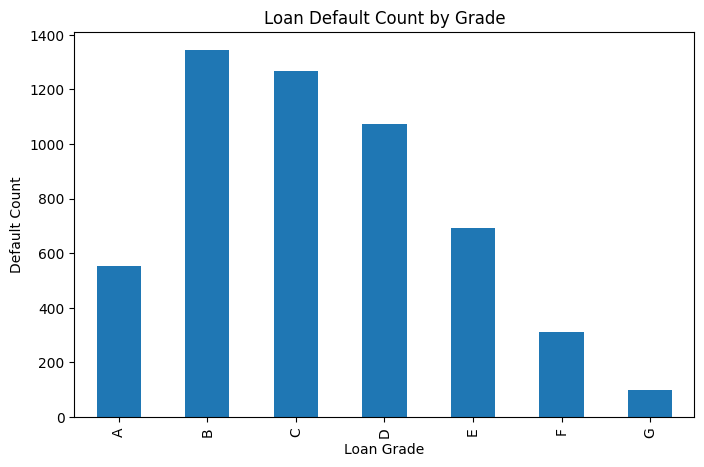

In [8]:
# Grade vs Default Analysis
grade_default = (
    df[df['loan_status'] == 'Charged Off']
    .groupby('grade')['loan_amount']
    .count()
)

plt.figure(figsize=(8,5))
grade_default.plot(kind='bar')
plt.title("Loan Default Count by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Default Count")
plt.show()

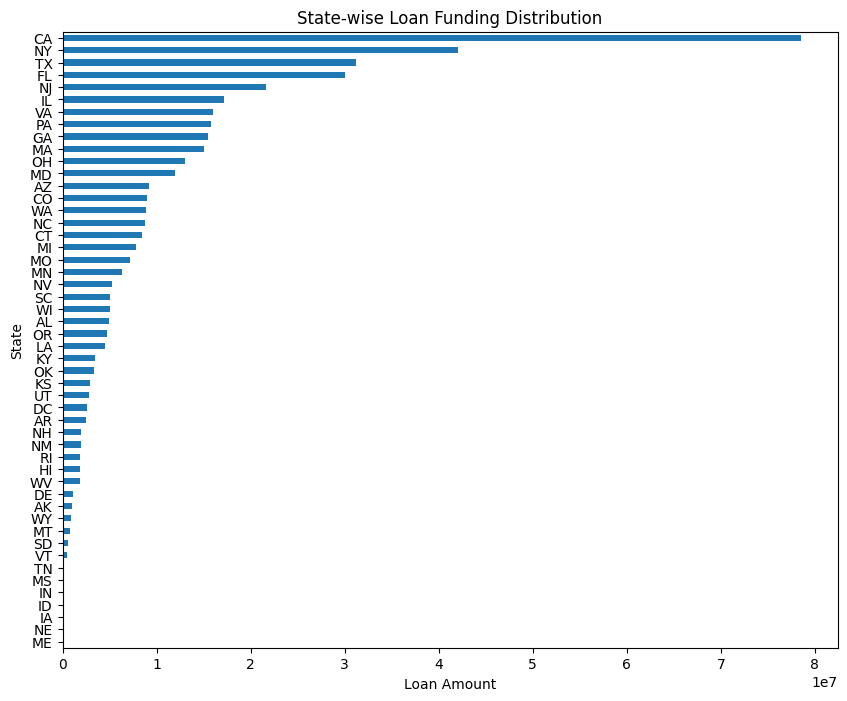

In [10]:
# State Exposure Distribution
state_data = df.groupby('address_state')['loan_amount'].sum()

plt.figure(figsize=(10,8))
state_data.sort_values().plot(kind='barh')
plt.title("State-wise Loan Funding Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("State")
plt.show()